In [1]:
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import cleaned csv
cleandata = "../Resources/Cleaned.csv"

df = pd.read_csv(cleandata)
df.head(25)

,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count
0,0,Kilian Stuba,2019,47.348580,10.171140,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1
1,1,Pfefferschiff,2019,47.837870,13.079170,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
2,2,Esszimmer,2019,47.806850,13.034090,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
3,3,Carpe Diem,2019,47.800010,13.040060,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
4,4,Edvard,2019,48.216503,16.368520,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
5,5,Das Loft,2019,48.212720,16.379310,Wien,Austria,1020,Modern cuisine,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
6,6,Pramerl & the Wolf,2019,48.209450,16.371740,Wien,Austria,1090,Creative,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
7,7,Walter Bauer,2019,48.209230,16.376720,Wien,Austria,1010,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
8,8,SHIKI,2019,48.204067,16.370980,Wien,Austria,1010,Japanese,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
9,9,Tian,2019,48.205130,16.374560,Wien,Austria,1010,Vegetarian,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1


In [3]:
df.region.unique()

array(['Austria', 'California', 'Chicago', 'Croatia', 'Czech Republic',
       'Denmark', 'Finland', 'Greece', 'Hong Kong', 'Hungary', 'Macau',
       'Norway', 'New York City', 'Poland', 'Ireland', 'Rio de Janeiro',
       'Sao Paulo', 'South Korea', 'Singapore', 'Sweden', 'Taipei',
       'Thailand', 'Washington DC', 'United Kingdom'], dtype=object)

In [5]:
#Filter down to US locations only
us_df = df.loc[(df['region'] == "California") | (df['region'] == "New York City") | (df['region'] == "Chicago") | (df['region'] == "Washington DC")]
us_df

,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count
12,12,Chez TJ,2019,37.394680,-122.08044,South San Francisco,California,94041,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1
13,13,Protégé,2019,37.427853,-122.14362,South San Francisco,California,94301,Contemporary,$$$,https://guide.michelin.com/us/en/california/so...,1
14,14,Madera,2019,37.420140,-122.21151,San Francisco,California,94025,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1
15,15,The Village Pub,2019,37.428970,-122.25178,San Francisco,California,94062,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1
16,16,Plumed Horse,2019,37.256480,-122.03537,South San Francisco,California,95070,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
681,22,Per Se,2019,40.768280,-73.98292,New York,New York City,10019,Contemporary,$$$$,https://guide.michelin.com/us/en/new-york-stat...,3
682,23,Le Bernardin,2019,40.761770,-73.98223,New York,New York City,10019,Seafood,$$$$,https://guide.michelin.com/us/en/new-york-stat...,3
683,24,Eleven Madison Park,2019,40.741700,-73.98712,New York,New York City,10010,Contemporary,$$$$,https://guide.michelin.com/us/en/new-york-stat...,3
684,25,Chef's Table at Brooklyn Fare,2019,40.688720,-73.98581,New York,New York City,10018,Contemporary,$$$$,https://guide.michelin.com/us/en/new-york-stat...,3


In [6]:
us_df.cuisine.value_counts()

Contemporary     75
Japanese         38
Californian      14
American         10
Italian          10
French            9
Mexican           6
Korean            5
Seafood           5
Fusion            4
Chinese           3
Indian            3
Scandinavian      3
Mediterranean     3
Thai              2
Asian             2
Steakhouse        2
Gastropub         2
Vegetarian        1
Spanish           1
International     1
Austrian          1
Moroccan          1
European          1
Name: cuisine, dtype: int64

In [7]:
us_df.cuisine.unique()

array(['Contemporary', 'Japanese', 'Indian', 'Korean', 'Californian',
       'American', 'International', 'Moroccan', 'Thai', 'Chinese',
       'Fusion', 'Italian', 'French', 'Asian', 'Steakhouse', 'Mexican',
       'Gastropub', 'Austrian', 'Seafood', 'Mediterranean', 'Vegetarian',
       'Spanish', 'Scandinavian', 'European'], dtype=object)

In [8]:
us_df.price.value_counts()

$$$$    134
$$$      49
$$       19
Name: price, dtype: int64

In [9]:
star_df = us_df["Michelin Star Count"].value_counts().reset_index()
star_df.columns= ["Micheline Star", "Count"]
star_df

,Micheline Star,Count
0,1,155
1,2,33
2,3,14


What cuisine types are most popular in Michelin star restaurants?

In [10]:
us_df["cuisine"].unique

<bound method Series.unique of 12     Contemporary
13     Contemporary
14     Contemporary
15     Contemporary
16     Contemporary
           ...     
681    Contemporary
682         Seafood
683    Contemporary
684    Contemporary
689        American
Name: cuisine, Length: 202, dtype: object>

In [11]:
#Find amount of Michelin Star Restaurants by cuisine
cuisine_df = us_df["cuisine"].value_counts().reset_index()
cuisine_df.columns= ["Cuisine", "Count"]
cuisine_df

,Cuisine,Count
0,Contemporary,75
1,Japanese,38
2,Californian,14
3,American,10
4,Italian,10
5,French,9
6,Mexican,6
7,Korean,5
8,Seafood,5
9,Fusion,4


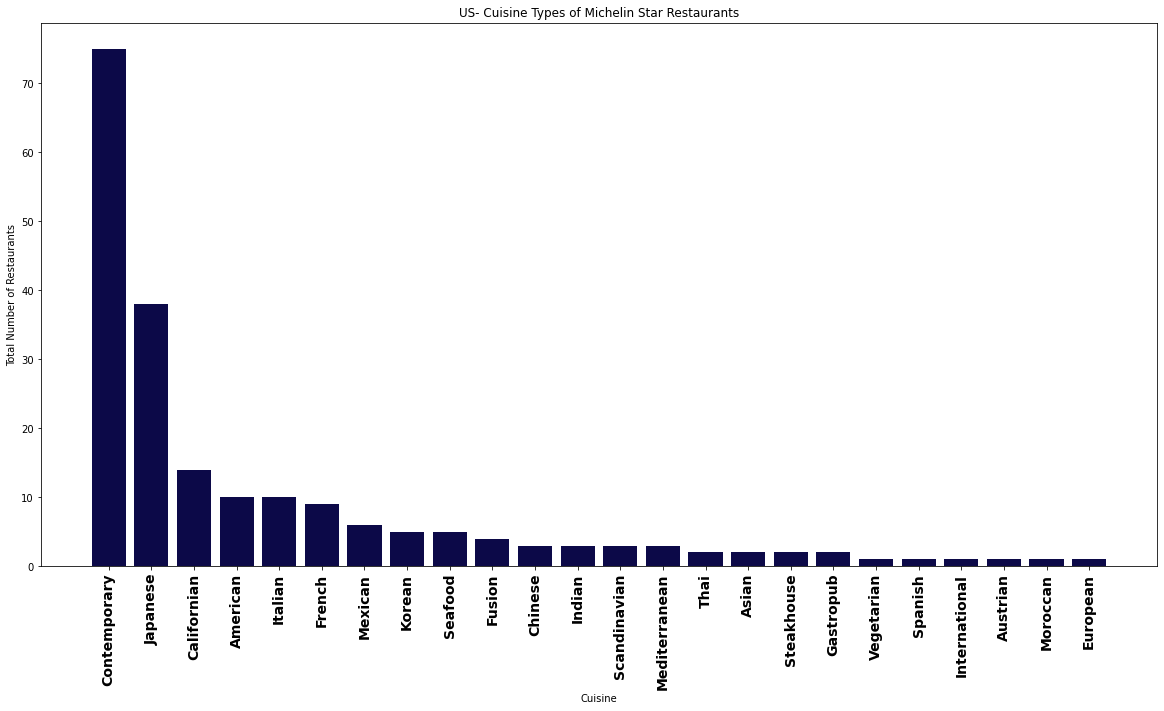

In [30]:
#Graph all Cuisine types b y count
plt.figure(figsize=(20,10))
plt.bar(cuisine_df["Cuisine"], cuisine_df["Count"], color= "#0C0948")
plt.xticks(cuisine_df["Cuisine"], rotation='vertical', fontsize= 14, weight= 'bold')
plt.title("US- Cuisine Types of Michelin Star Restaurants")
plt.xlabel("Cuisine")
plt.ylabel("Total Number of Restaurants")
plt.savefig('us_all_cuisine_chart.png')
plt.show()

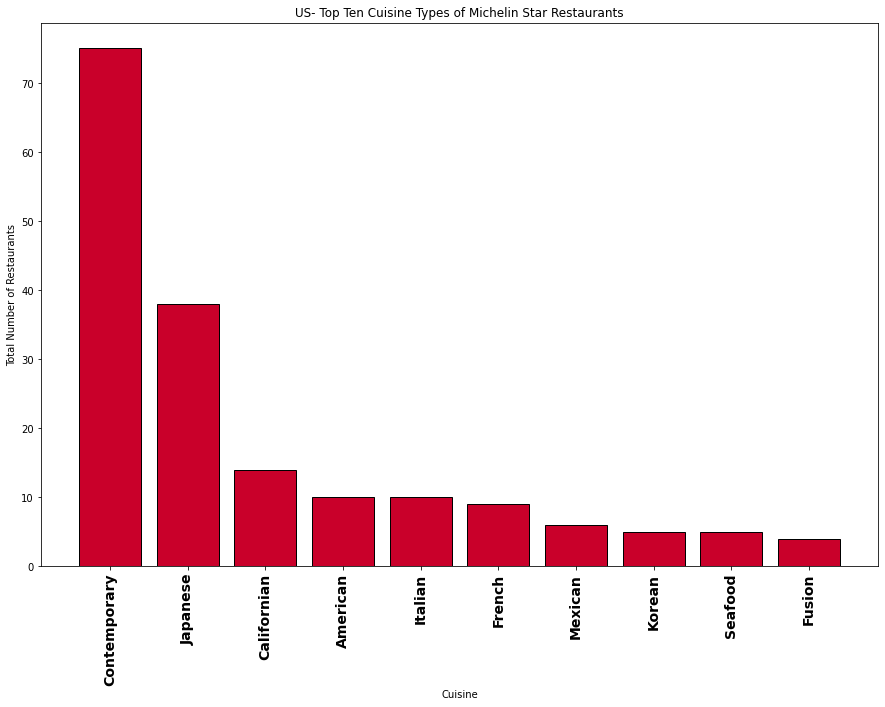

In [16]:
#Graph top ten cuisine types
top_cuisine= cuisine_df.head(10)
plt.figure(figsize=(15,10))
plt.bar(top_cuisine["Cuisine"], top_cuisine["Count"], color= "#C9002A", edgecolor= "black")
plt.xticks(top_cuisine["Cuisine"], rotation='vertical', fontsize= 14, weight= "bold")
plt.title("US- Top Ten Cuisine Types of Michelin Star Restaurants")
plt.xlabel("Cuisine")
plt.ylabel("Total Number of Restaurants")
plt.savefig('us_top_ten_cuisine.png')
plt.show()


What proportion of Michelin star restaurants is one versus two versus three star restaurants?


In [17]:
star_df = us_df["Michelin Star Count"].value_counts().reset_index()
star_df.columns= ["Micheline Star", "Count"]
star_df

,Micheline Star,Count
0,1,155
1,2,33
2,3,14


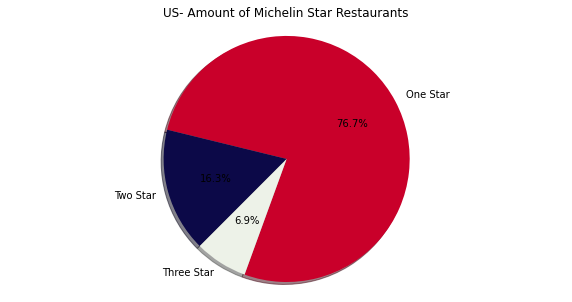

In [29]:
#Pie chart of Michelin Star restaurants globally
plt.figure(figsize=(10,5))
labels = ["One Star", "Two Star", "Three Star"]
colors = ["#C9002A", "#0C0948", "#EDF2E8"]
plt.pie(star_df["Count"], labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.axis("equal")
plt.title("US- Amount of Michelin Star Restaurants")
plt.savefig('us_star_rating_all_pie.png')
plt.show()

What is the most frequent cuisine style by star rating?

In [19]:
top_cuisine

,Cuisine,Count
0,Contemporary,75
1,Japanese,38
2,Californian,14
3,American,10
4,Italian,10
5,French,9
6,Mexican,6
7,Korean,5
8,Seafood,5
9,Fusion,4


In [20]:
mask= df["Michelin Star Count"]==1
one_star = df.value_counts(df.cuisine.loc[mask]).reset_index()
one_star.columns= ["cuisine", "count"]
one_star_top=one_star.head(10)
one_star_top

,cuisine,count
0,Modern cuisine,97
1,Contemporary,47
2,Japanese,44
3,Modern British,34
4,Cantonese,31
5,Creative,29
6,Innovative,21
7,French,19
8,Italian,19
9,Classic cuisine,14


In [21]:
mask= df["Michelin Star Count"]==2
two_star = df.value_counts(df.cuisine.loc[mask]).reset_index()
two_star.columns= ["cuisine", "count"]
two_star_top=two_star.head(10)
two_star_top

,cuisine,count
0,Contemporary,18
1,Creative,14
2,Modern cuisine,9
3,Japanese,8
4,French,7
5,French contemporary,7
6,Innovative,6
7,Cantonese,5
8,Sushi,4
9,Modern British,4


In [22]:
mask= df["Michelin Star Count"]==3
three_star = df.value_counts(df.cuisine.loc[mask]).reset_index()
three_star.columns= ["cuisine", "count"]
three_star_top=three_star.head(10)
three_star_top

,cuisine,count
0,Contemporary,10
1,Cantonese,4
2,Creative,3
3,French,3
4,French contemporary,2
5,Japanese,2
6,Korean,2
7,Modern cuisine,2
8,American,1
9,Asian,1


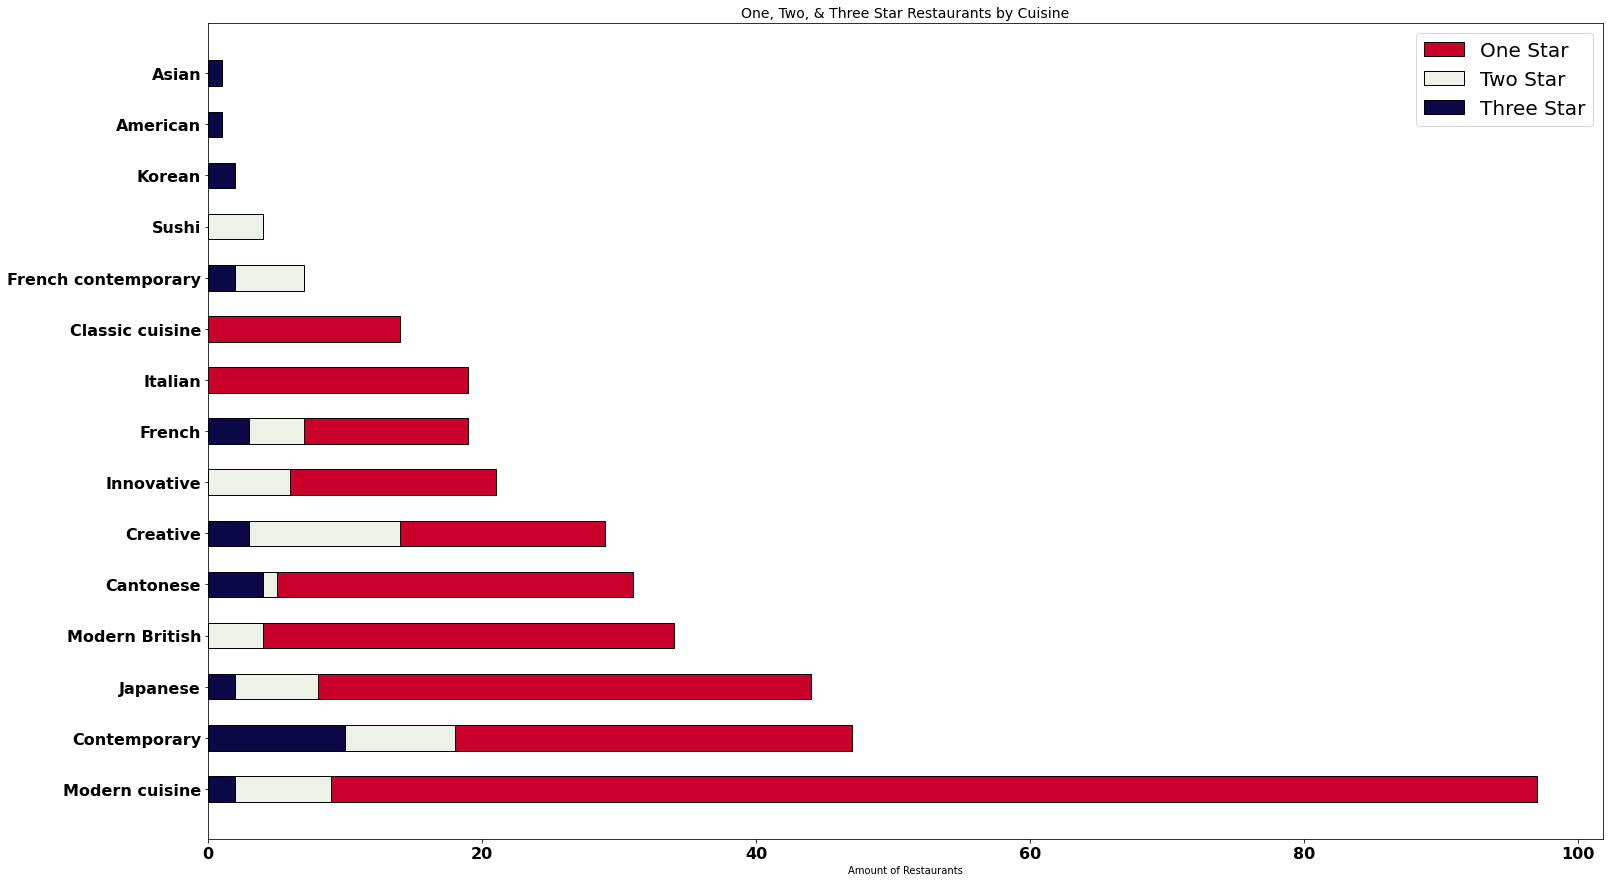

In [27]:
#Stacked Bar Chart
plt.figure(figsize=(25,15))
plt.barh(one_star_top["cuisine"], one_star_top["count"], 0.5, label= "One Star", color= "#C9002A",  edgecolor= "black" )
plt.barh(two_star_top["cuisine"], two_star_top["count"], 0.5, label= "Two Star", color = "#EDF2E8", edgecolor= "black")
plt.barh(three_star_top["cuisine"], three_star_top["count"], 0.5, label= "Three Star", color= "#0C0948", edgecolor= "black")
plt.xlabel("Amount of Restaurants")
plt.yticks( rotation='horizontal', fontsize= 16, weight= "bold")
plt.xticks( fontsize= 16, weight= "bold")
plt.title("One, Two, & Three Star Restaurants by Cuisine", fontsize= 14)
plt.legend(prop={'size': 20})
plt.savefig('us_star_rating_cuisine_stackedbar.png')
plt.show()
